# **World Population Data**
**In this Dataset, we have Historical Population data for every Country in the world by different parameters like Indicator Code of the Country,World Population Percentage, etc.**

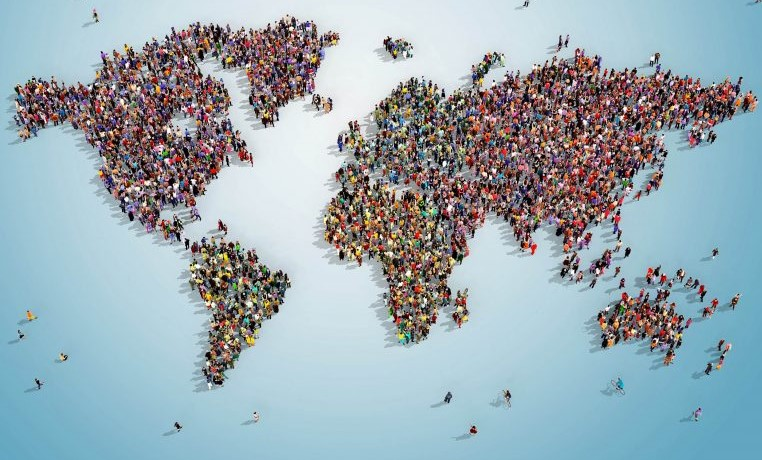

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# **Data Wrangling Function**
**This function reads a CSV file from the specified path, conducts various data wrangling operations like setting the index, checking for missing values, duplicates, dropping unnecessary columns, filling missing values, and then returns the processed DataFrame.**

In [ ]:
def wrangle(data_path):
    df = pd.read_csv(data_path)

    # Displaying the initial observations
    print("Initial Observations:")
    print(df.head(10))
    print()

    # Ensure 'Country Name' is the index for easy selection
    df.set_index('Country Name', inplace=True)

    # Conducting an examination of data types and missing values
    print("Info about data:")
    print(df.info(show_counts=True))
    print()

    # Check for duplicated rows
    print("Number of duplicated rows:", df.duplicated().sum())
    print()

    # Descriptive statistics
    print("Descriptive Statistics:")
    print(df.describe().transpose())
    print()

    #print shape of data
    print(df.shape)

    # delete indicator code, country code, Indicator Name not needed
    df.drop(['Indicator Code','Country Code','Indicator Name'], axis=1, inplace=True)

    # Columns with null values
    print("Columns with null values:")
    columns_with_null = df.columns[df.isnull().any()].tolist()
    print(columns_with_null)
    print()

    # forward fill the null values in columns
    df.ffill(inplace=True)
    print()

    #to check is null again
    print(df.isnull().sum())

    return df

# Example usage
data_path = "Total_Population.csv"
data = wrangle(data_path)

Initial Observations:
                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   
5                      Albania          ALB  Population, total    SP.POP.TOTL   
6                      Andorra          AND  Population, total    SP.POP.TOTL   
7                   Arab World          ARB  Population, total    SP.POP.TOTL   
8         United Arab Emirates          ARE  Population, total    SP.POP.TOTL   
9                    Argentina          ARG  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0  

In [ ]:
data.head(5)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


# **World Population Map**
**we present the world map on two occasions: once in 2001 and again in 2022**

In [111]:
# Visualization for 2001 Population Map
fig_2001 = px.choropleth(data,
                         locations=data.index,
                         locationmode='country names',
                         color='2001',
                         hover_name=data.index,
                         title='2001 Population Map',
                         color_continuous_scale='oranges')
fig_2001.show()
# Visualization for 2022 Population Map
fig_2022 = px.choropleth(data,
                         locations=data.index,
                         locationmode='country names',
                         color='2022',
                         hover_name=data.index,
                         title='2022 Population Map',
                         color_continuous_scale='blues')
fig_2022.show()

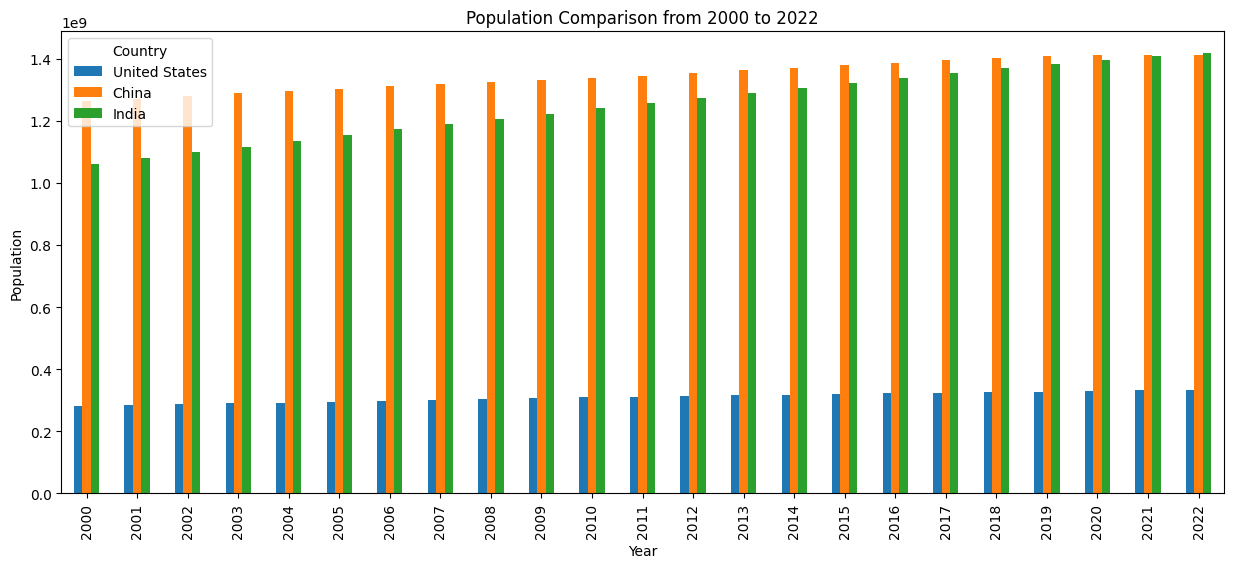

In [ ]:
##plot top of countries
selected_countries = ["United States", "China", "India"]
population_data = data.loc[selected_countries, :]
# Extract years and corresponding population data for each country
years = population_data.columns[-23:]
population_values = population_data.iloc[:, -23:]
# Plotting the bar chart
plt.figure(figsize=(15, 6))
plt.subplot(1, 1,1)
population_values.T.plot(kind='bar', ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Comparison from 2000 to 2022')
plt.legend(title='Country')

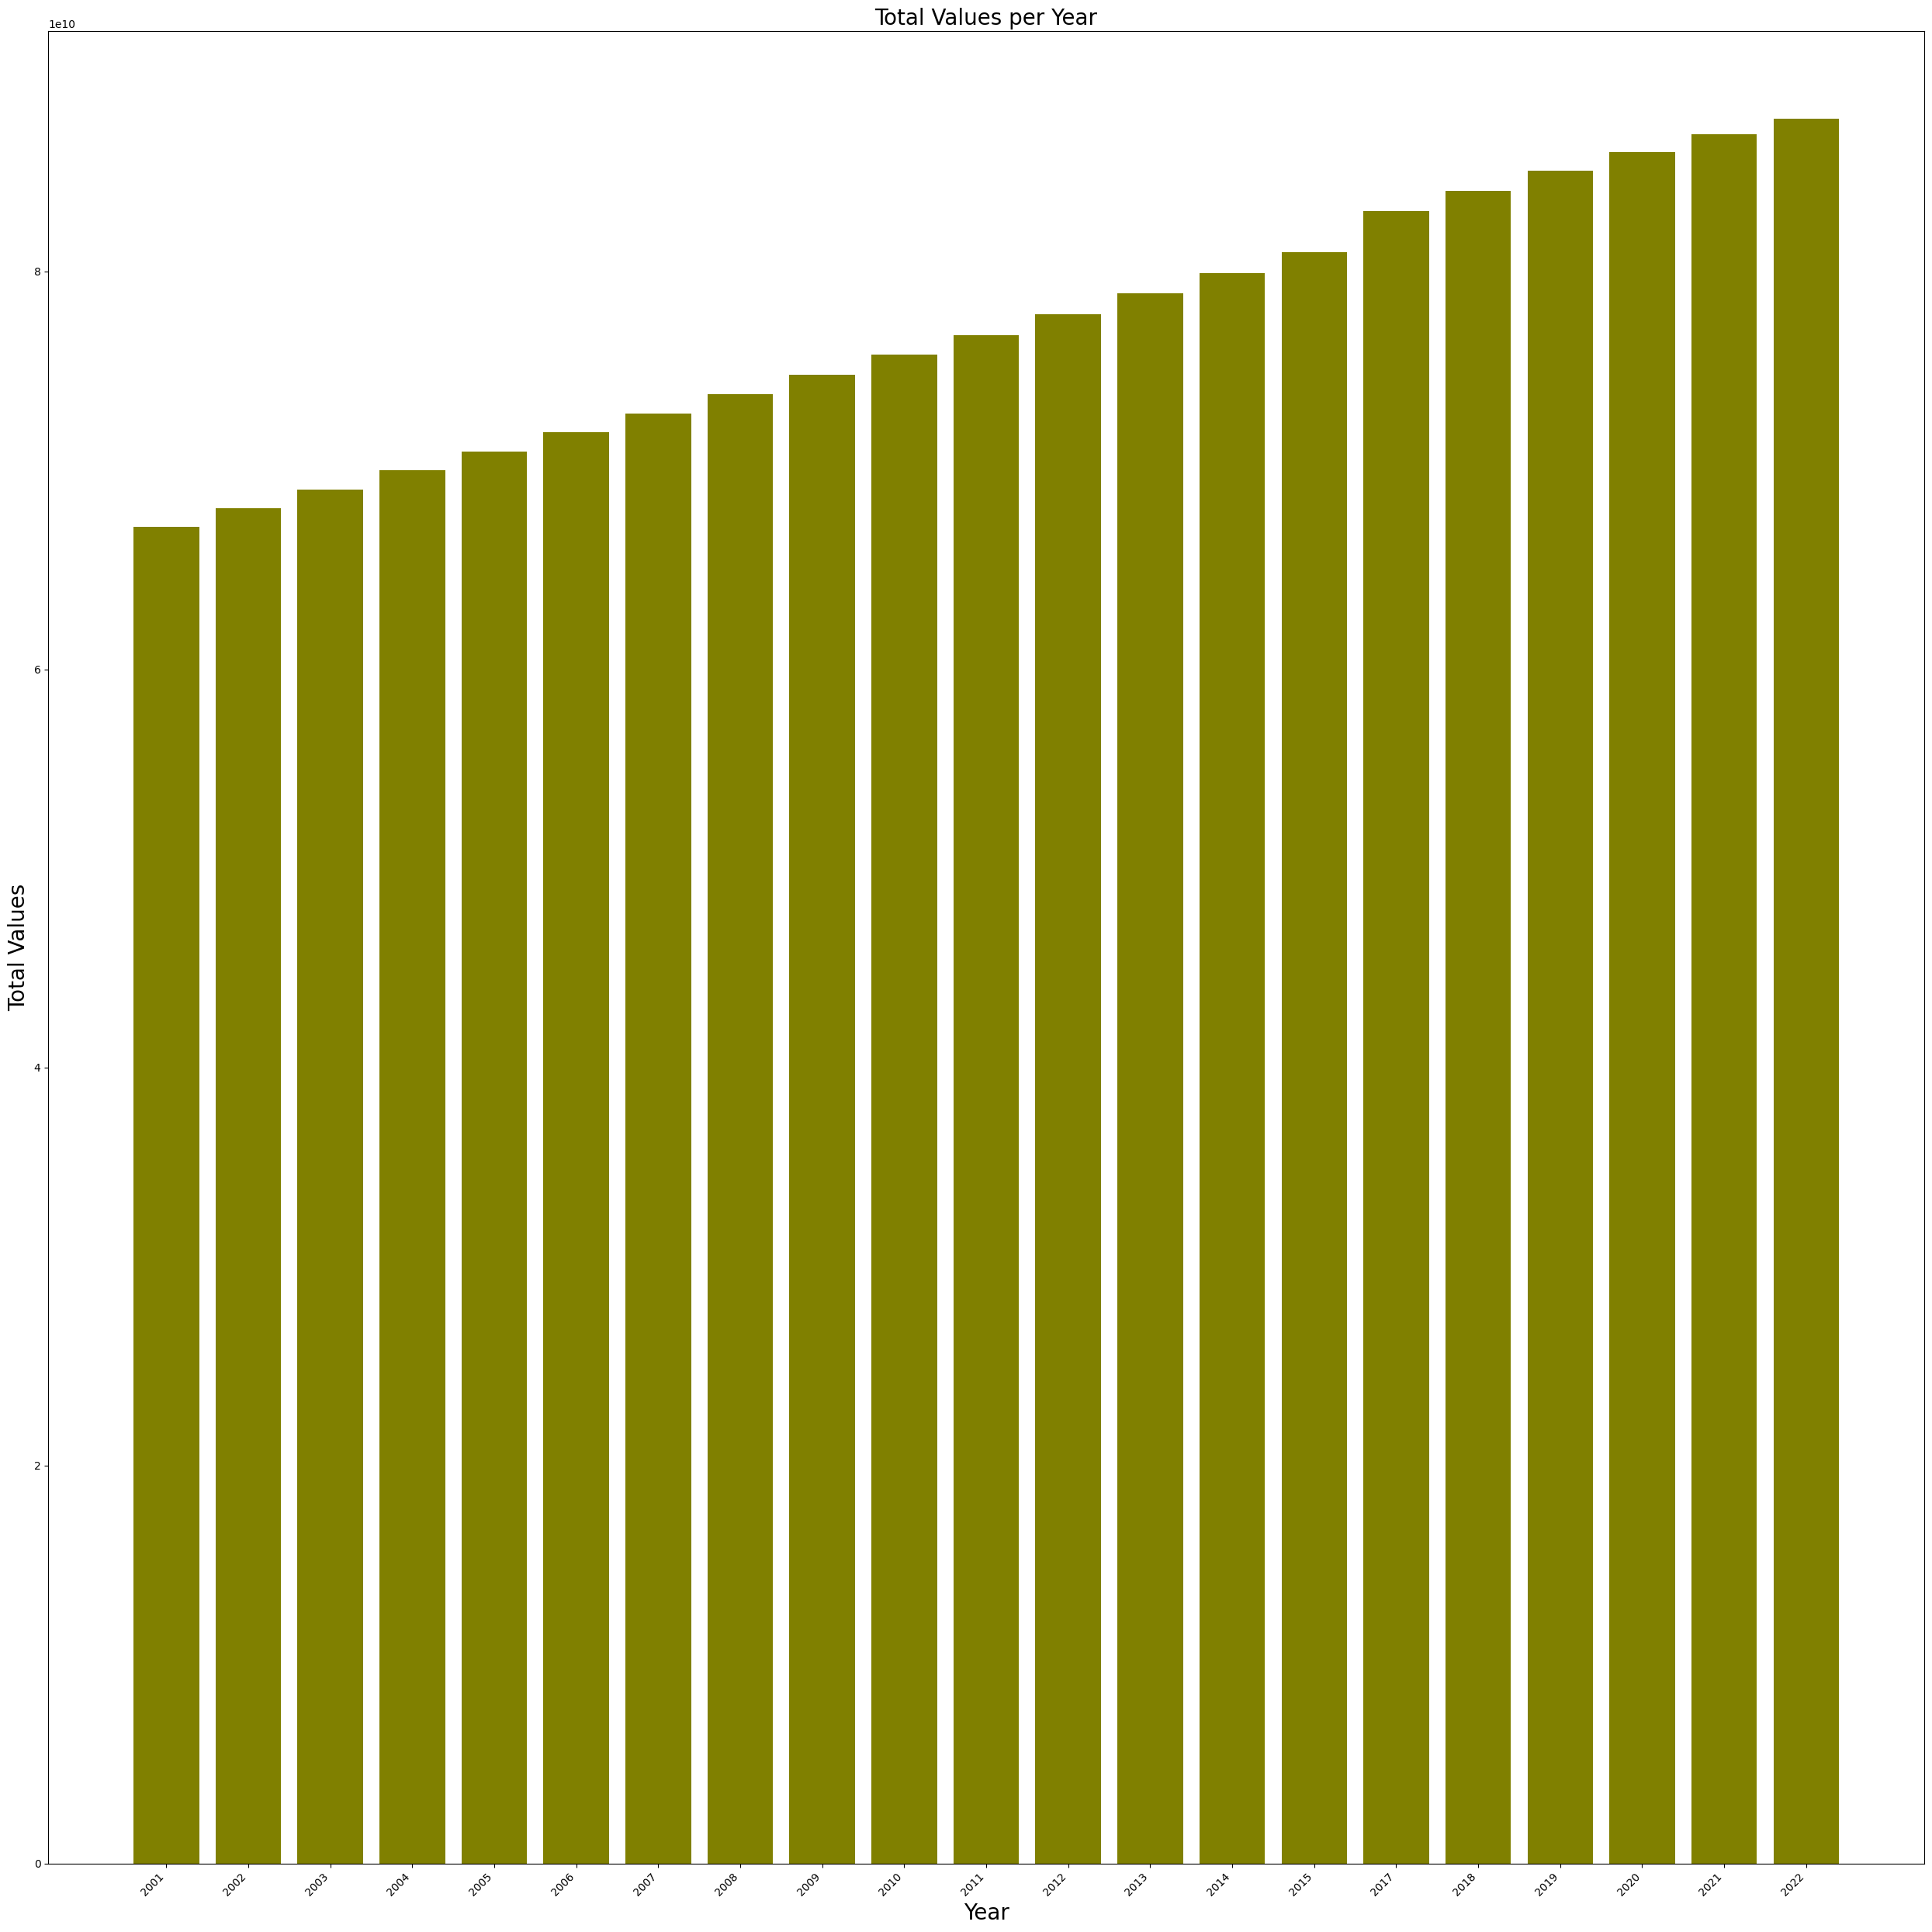

In [ ]:
# Define the years of interest
years = ['2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009','2010','2011','2012','2013','2014','2015',
       '2017','2018', '2019', '2020', '2021','2022']
# Calculate the total values for each year
total_values = data[years].sum()
# Plotting the bar chart
plt.figure(figsize=(25, 25))
plt.bar(years, total_values,color="olive")
plt.ylabel('Total Values', size=20)
plt.xlabel('Year', size=20)
plt.title('Total Values per Year', size=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Compare data of all year with base year 2001**

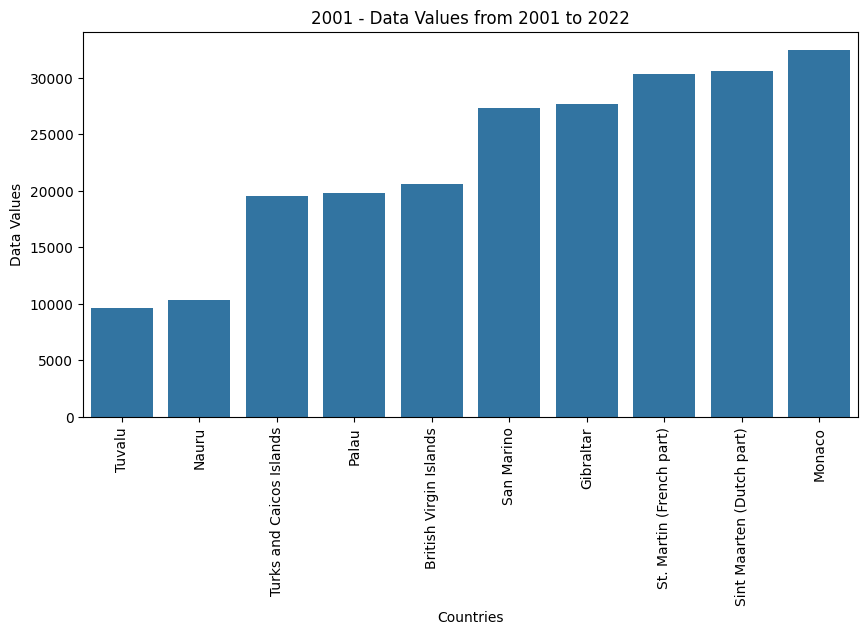

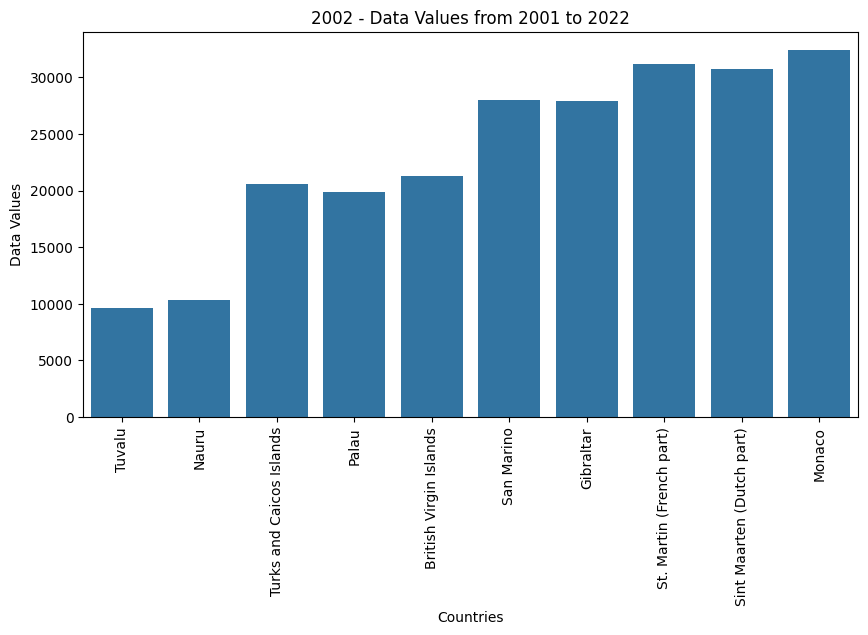

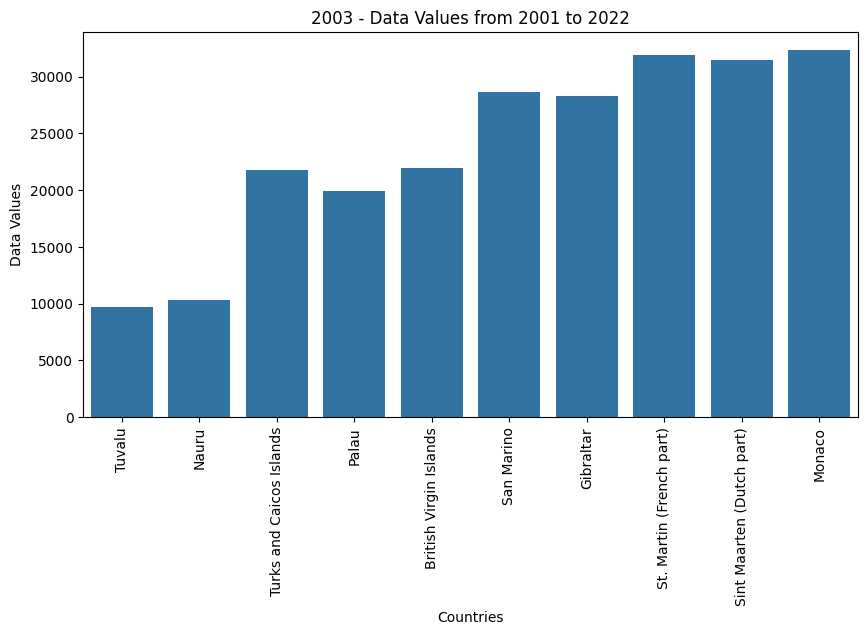

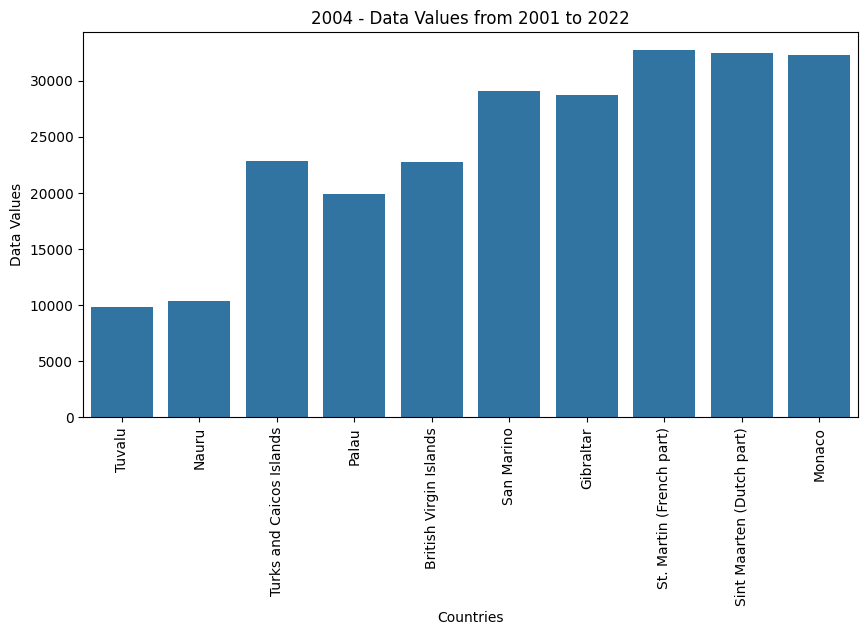

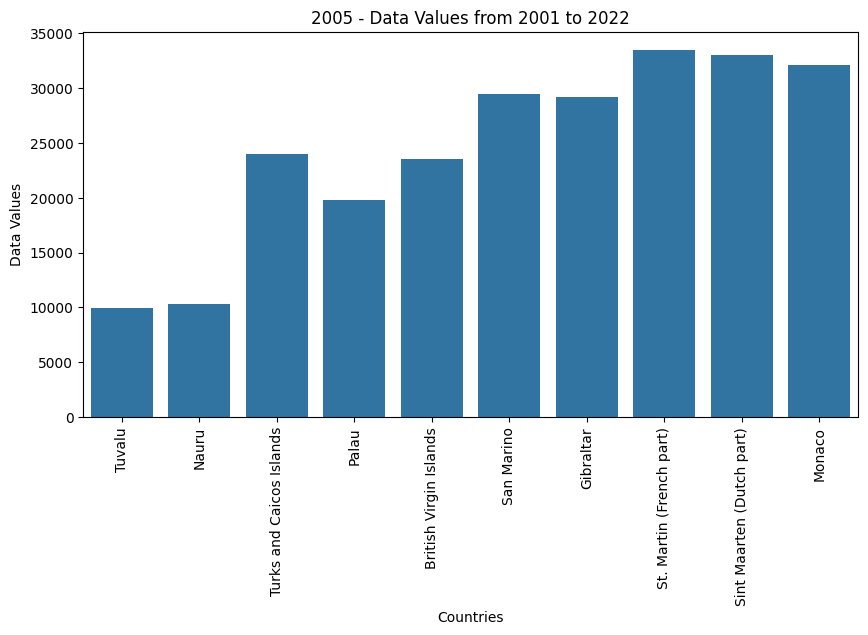

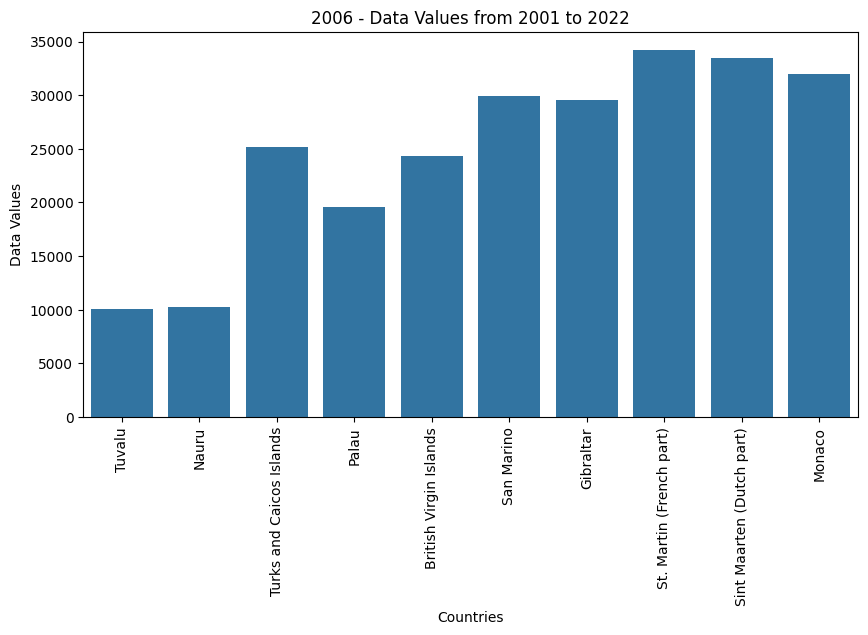

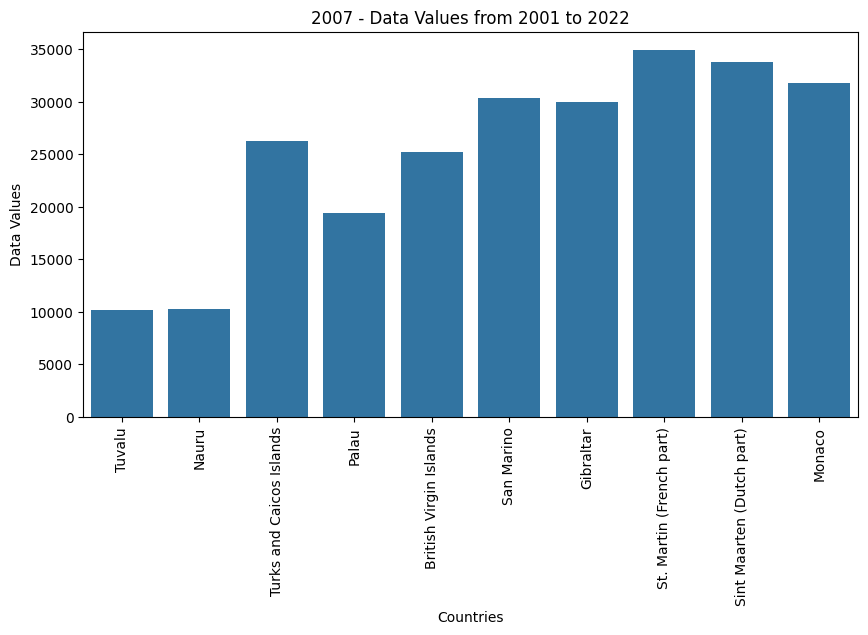

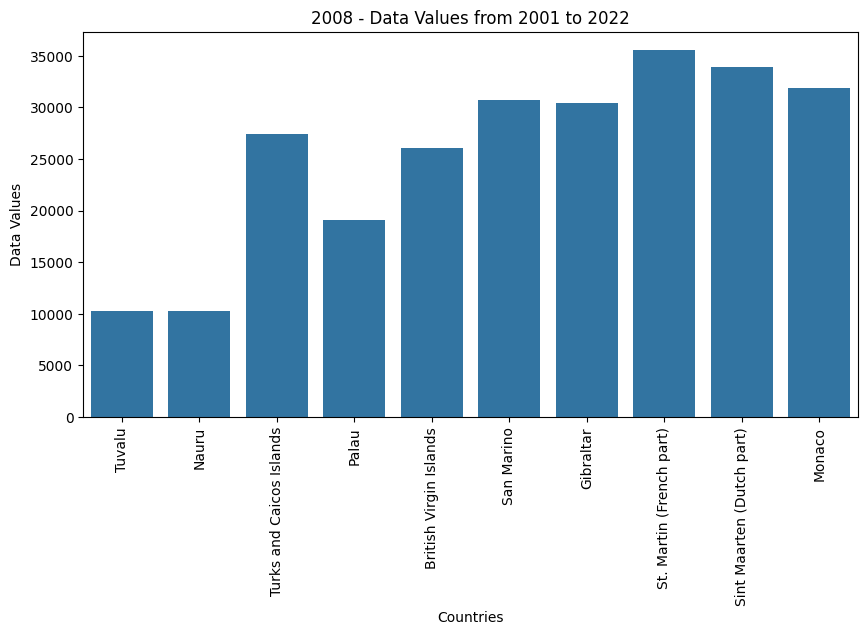

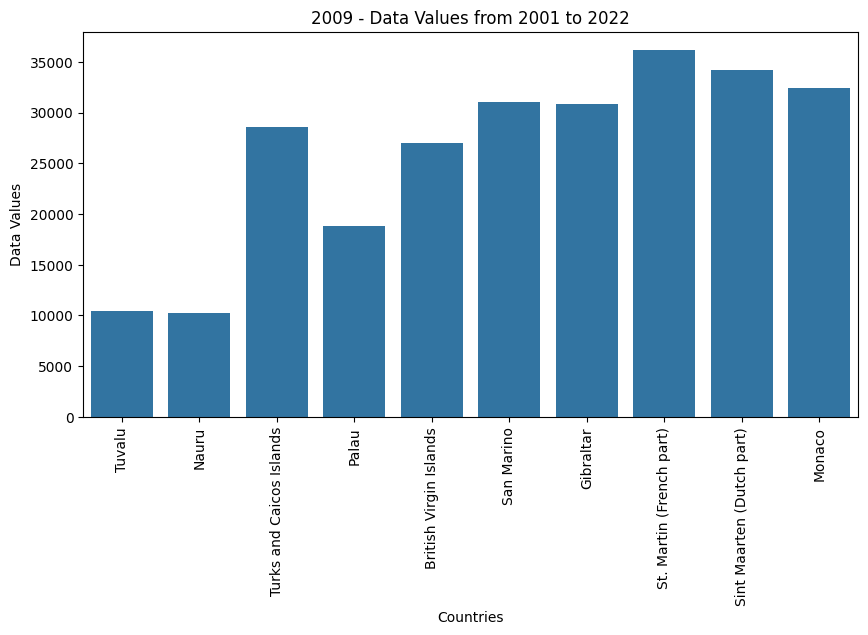

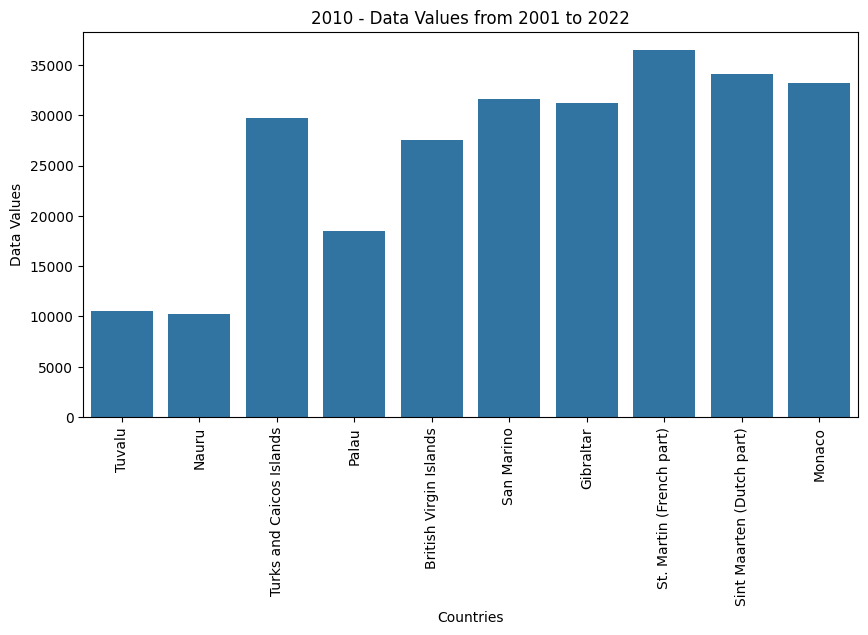

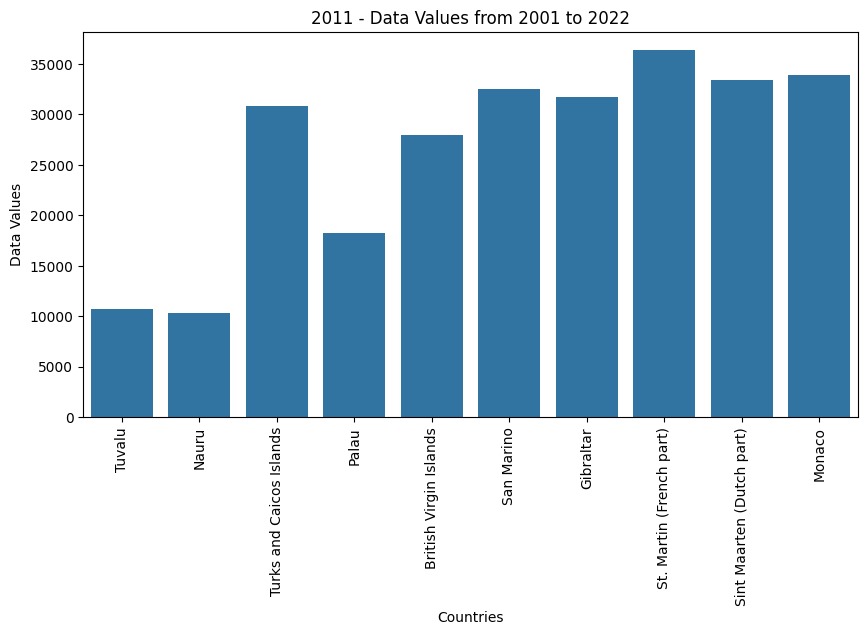

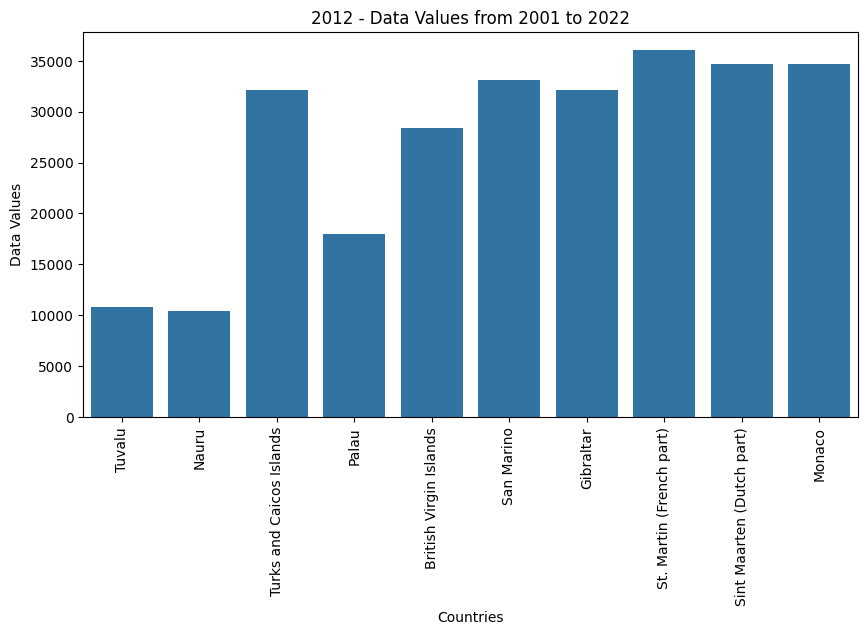

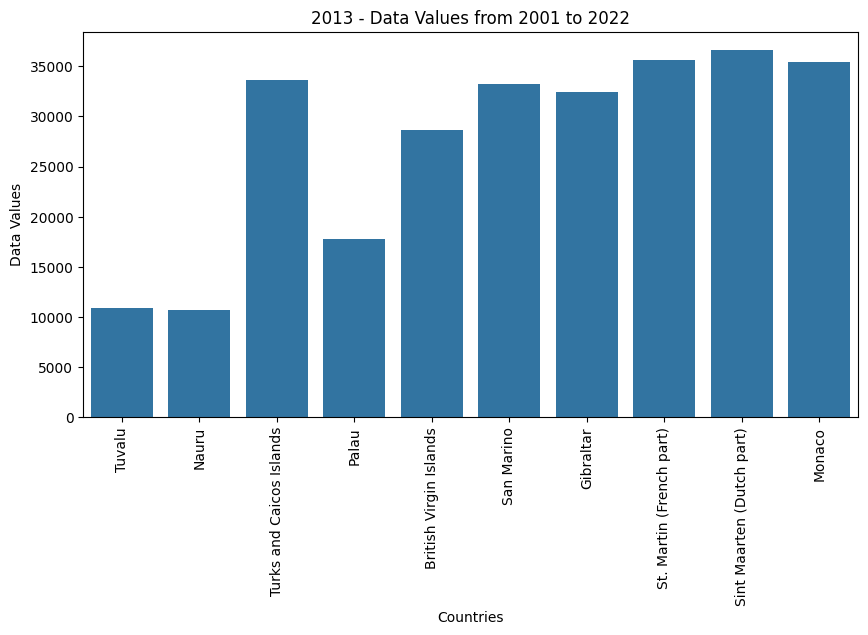

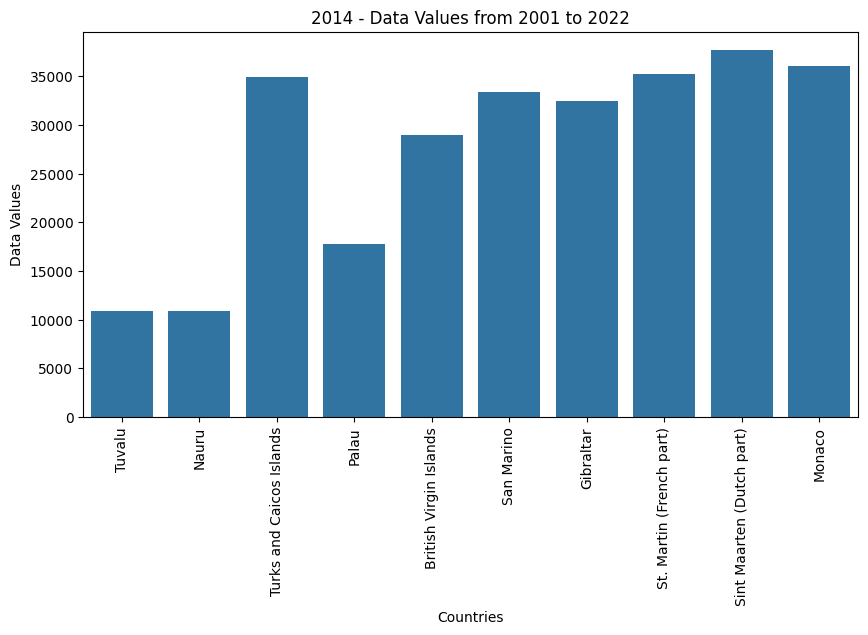

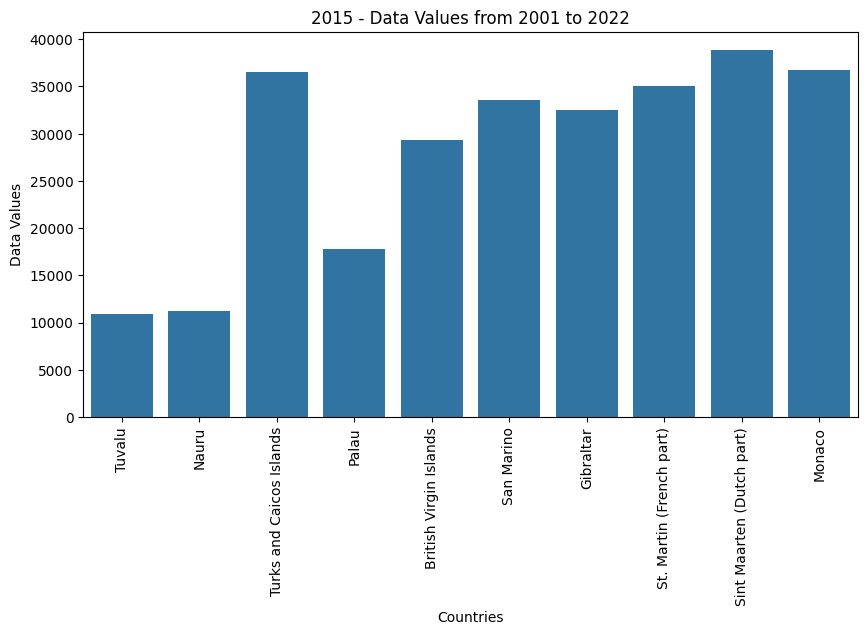

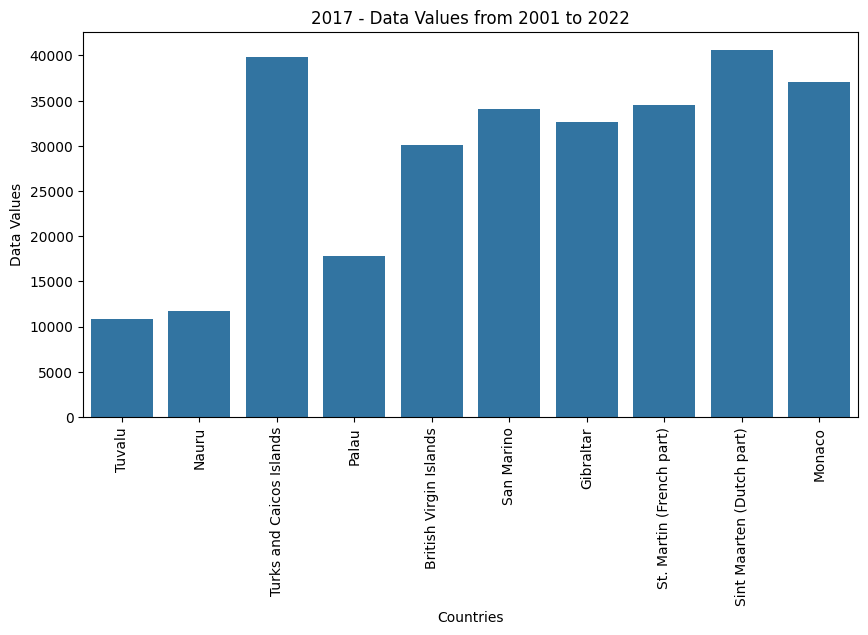

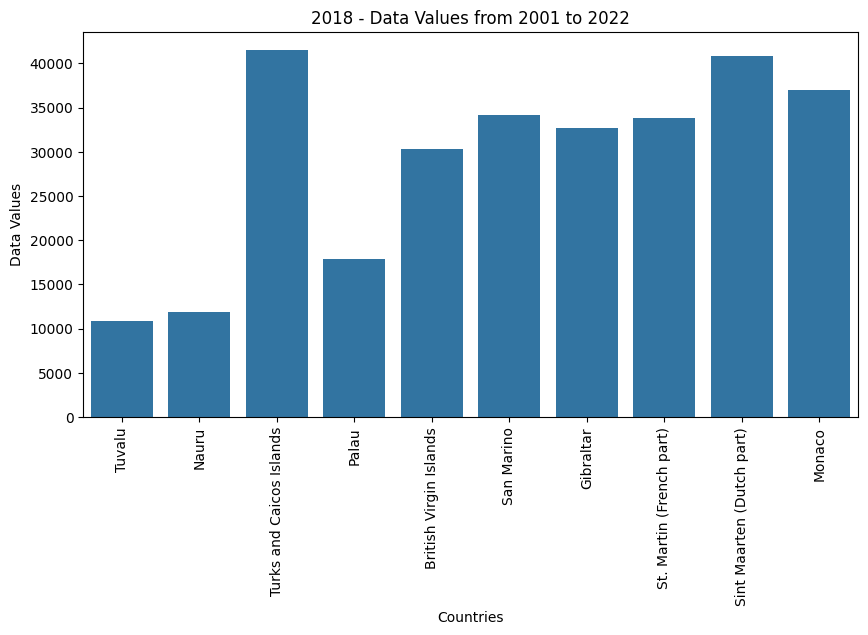

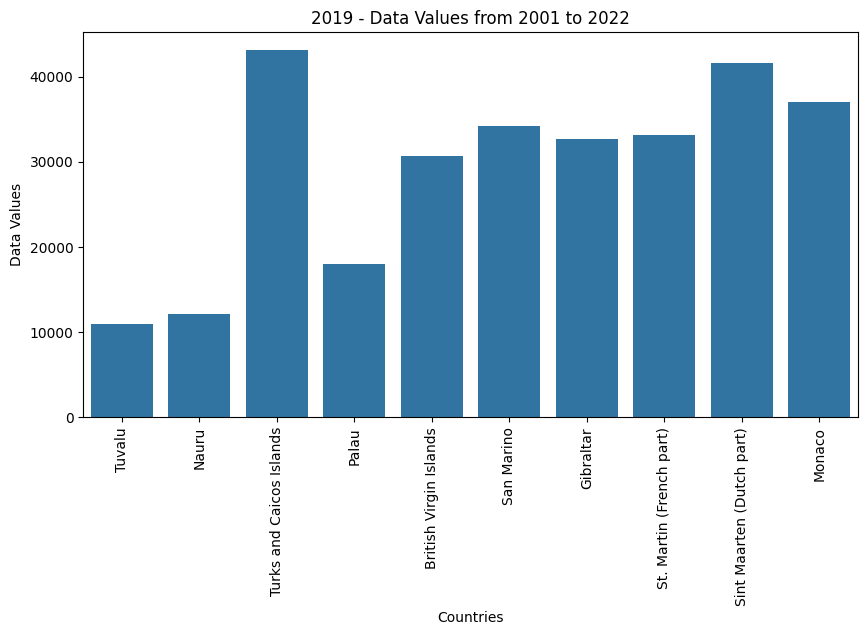

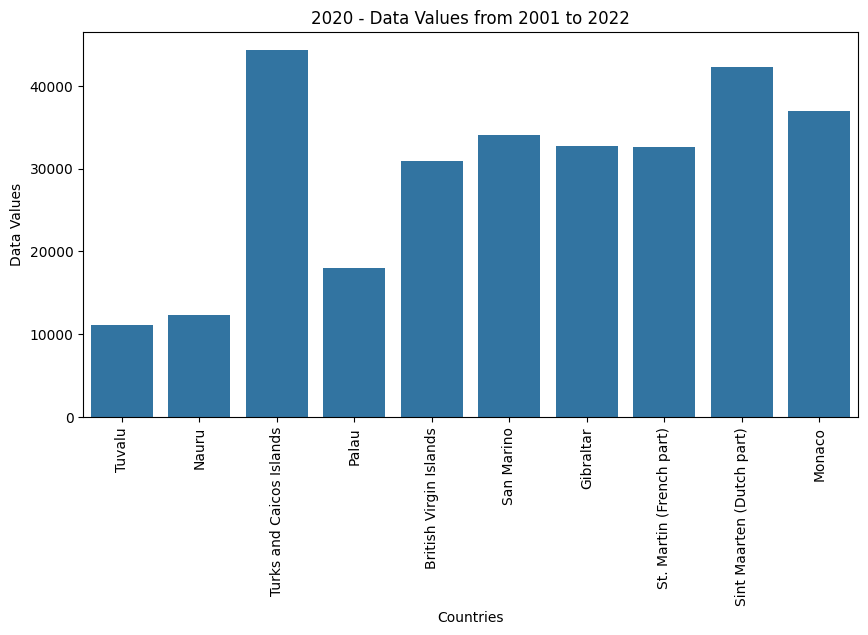

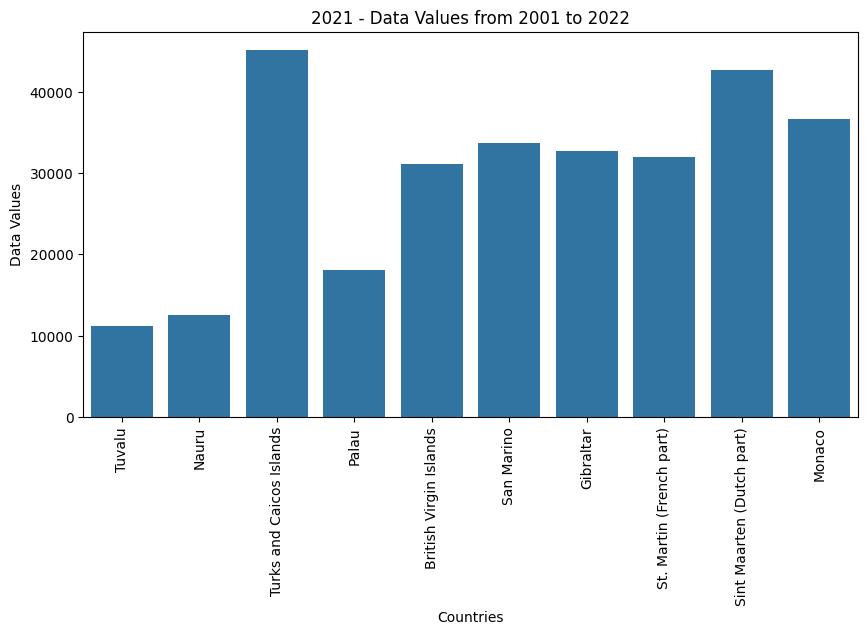

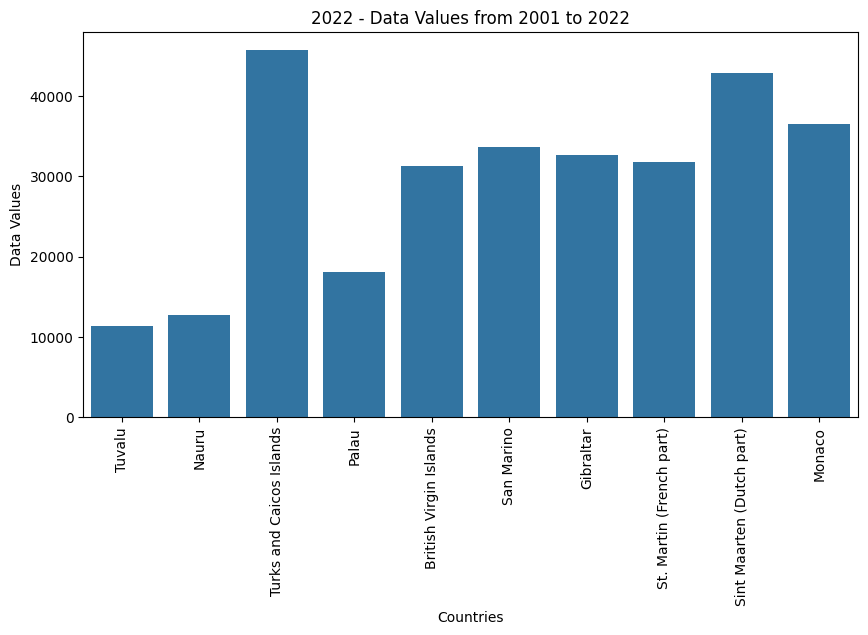

In [ ]:
top_countries=data.sort_values(by="2001").head(10)
country_by_2001=top_countries[years].T
for country_name, data_values in country_by_2001.iterrows():
    fig = plt.figure(figsize=(10, 5))
    sns.barplot(x=data_values.index, y=data_values.values)
    plt.xlabel('Countries')
    plt.ylabel('Data Values')
    plt.title(f"{country_name} - Data Values from 2001 to 2022")
    plt.xticks(rotation=90)
    plt.show()

# **Compare data of all year with base year 2022**

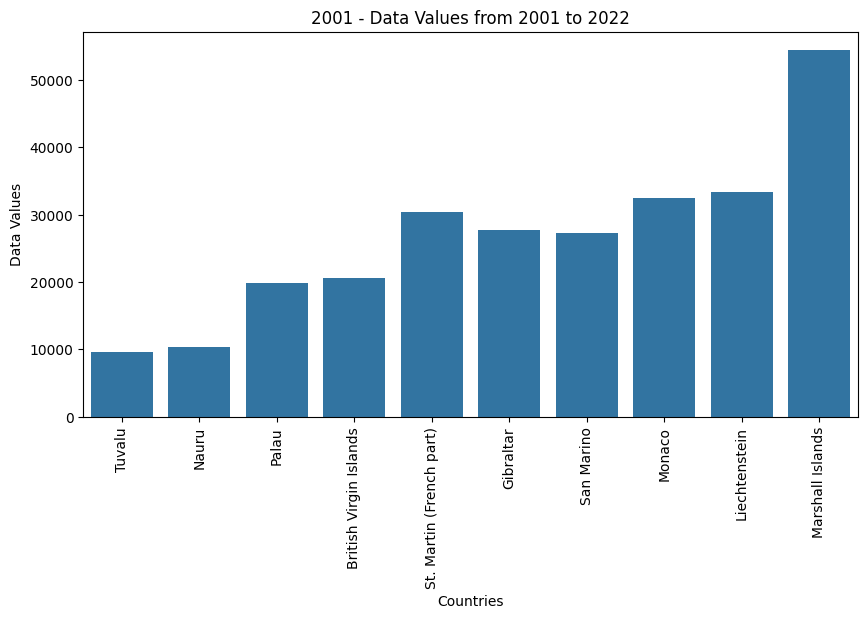

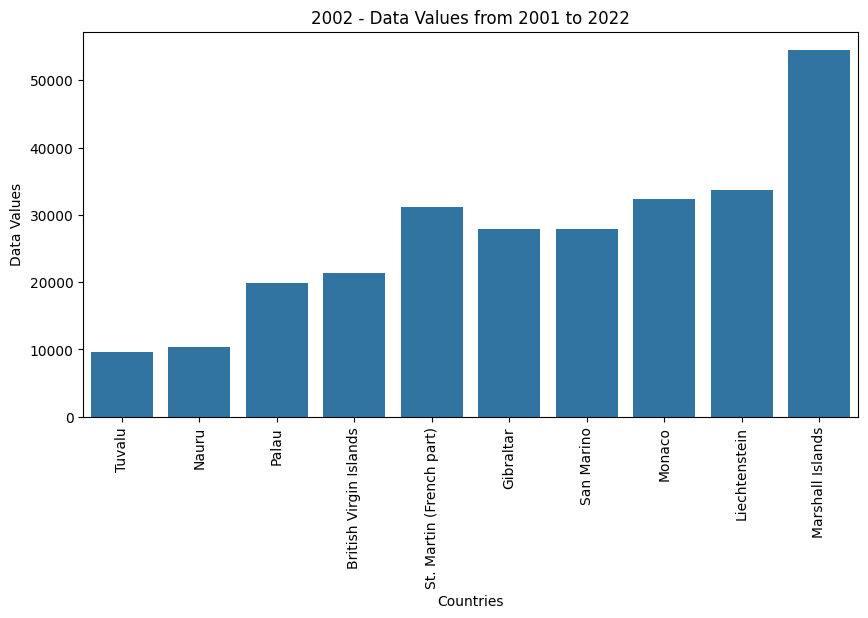

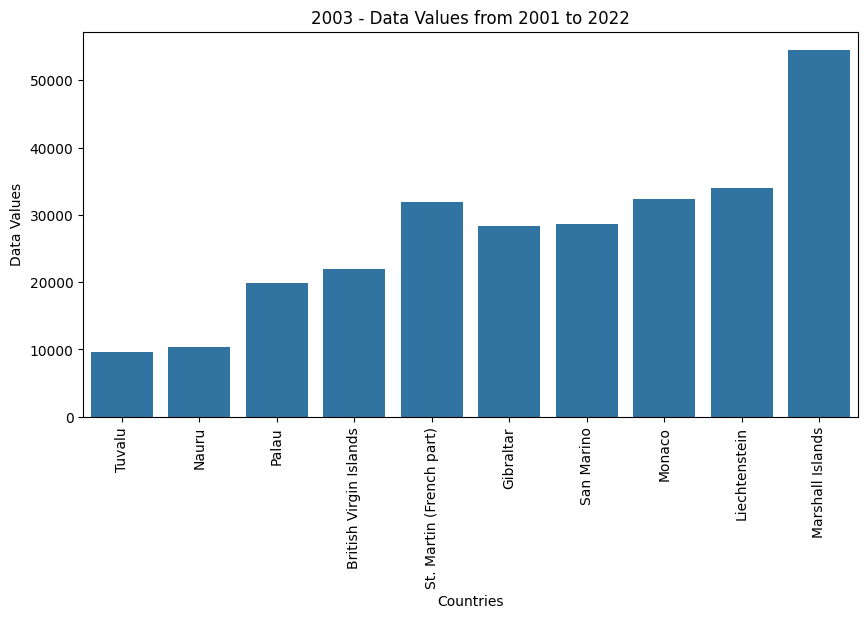

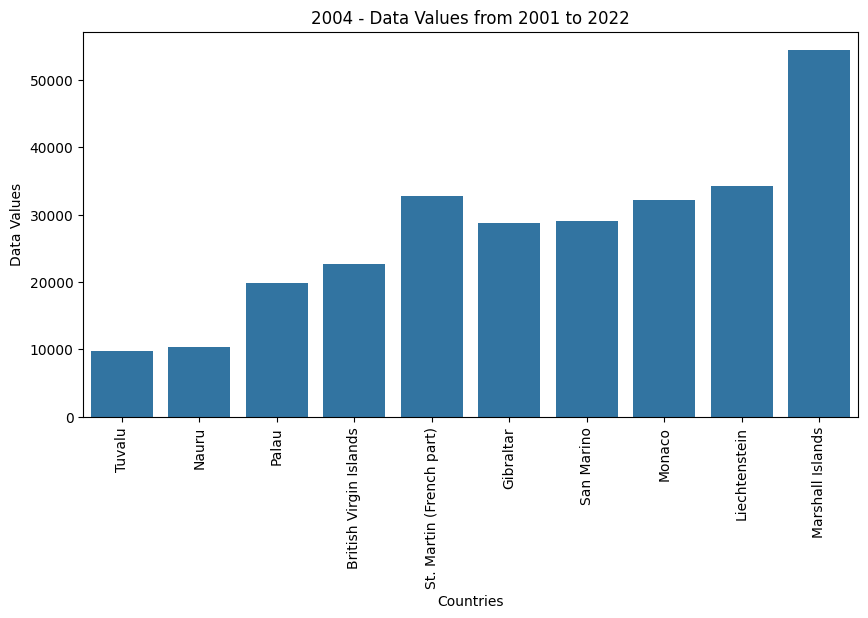

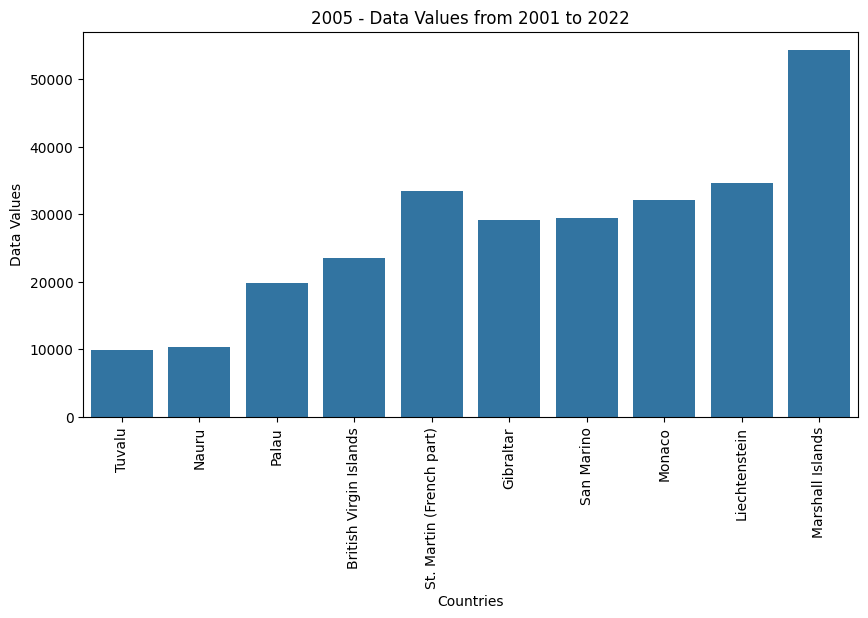

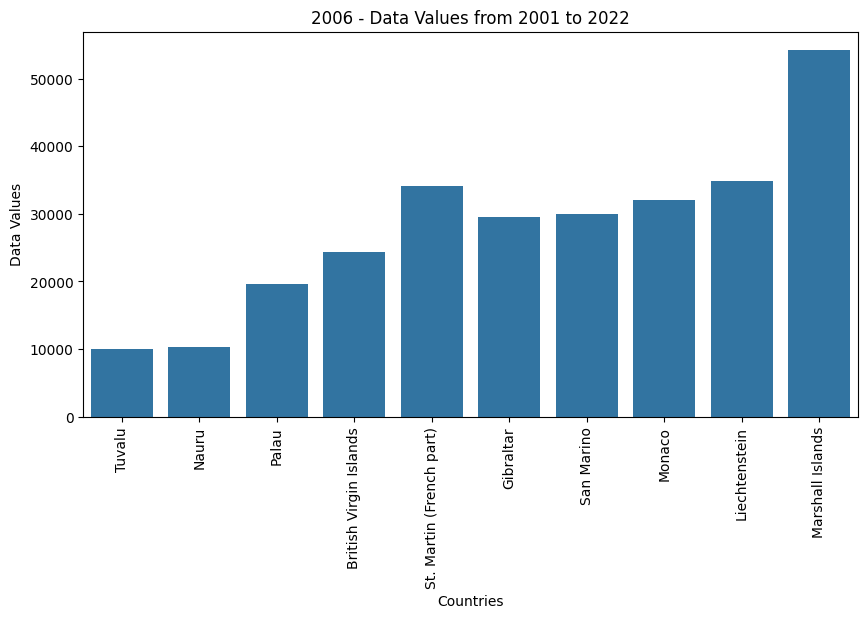

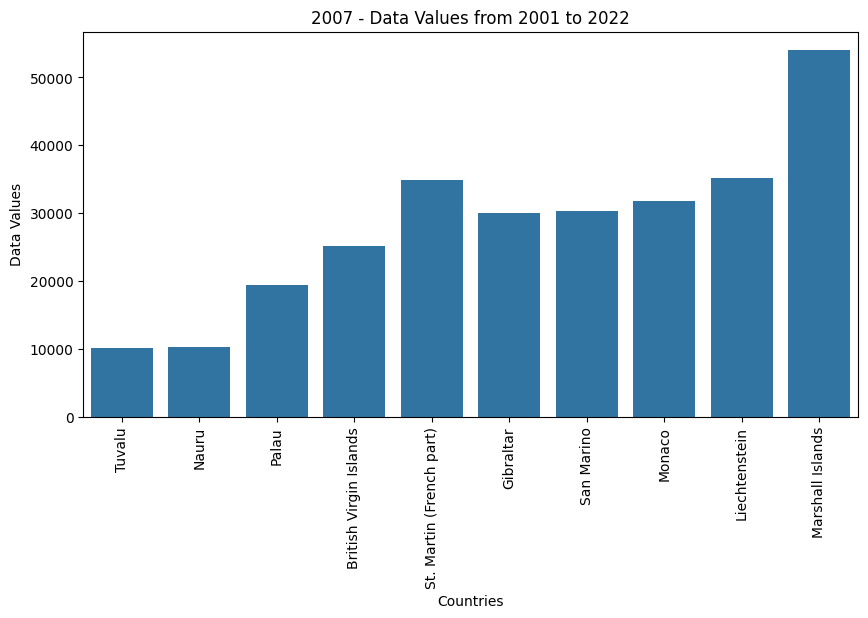

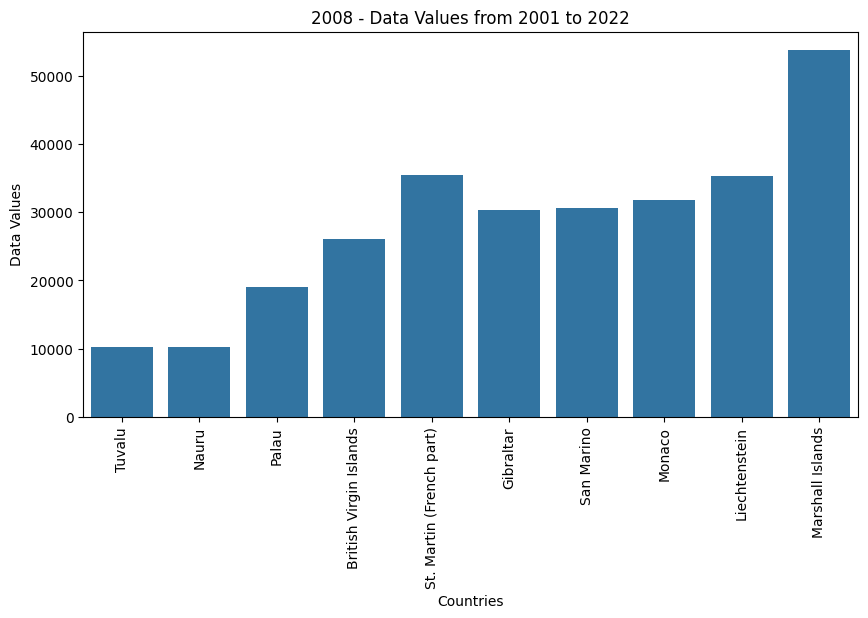

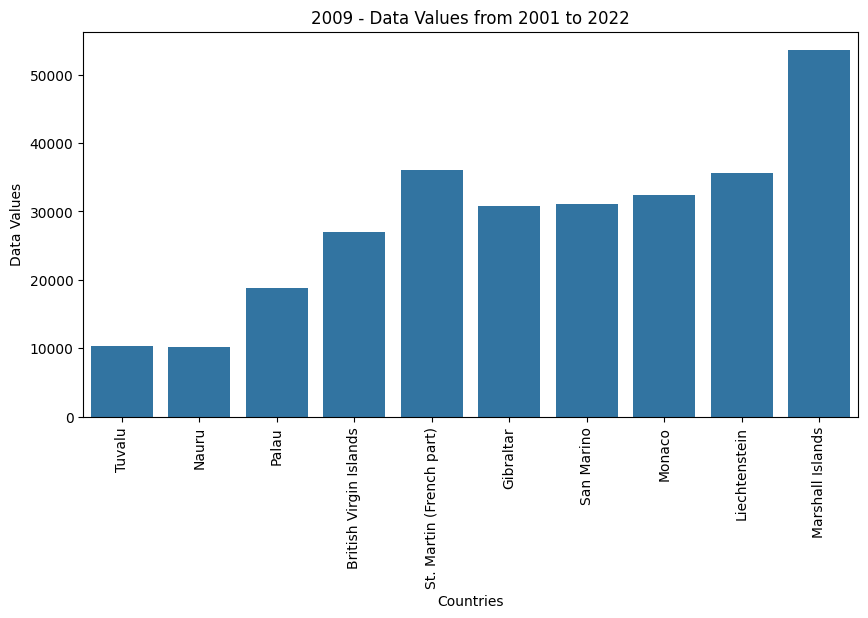

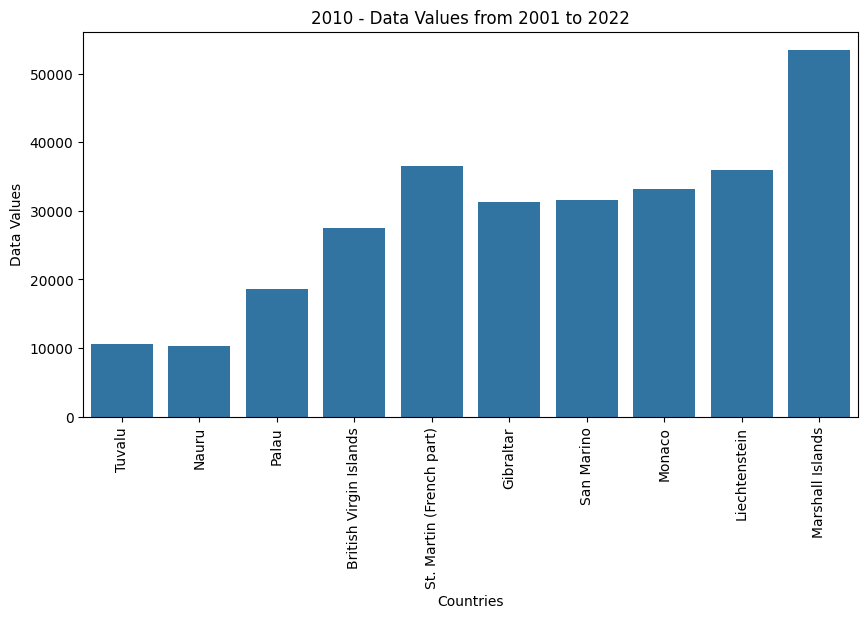

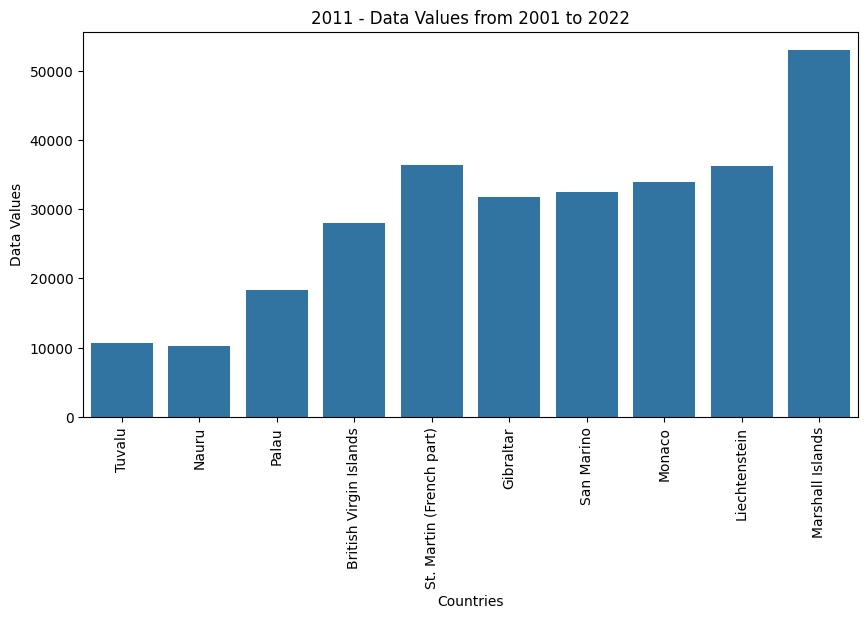

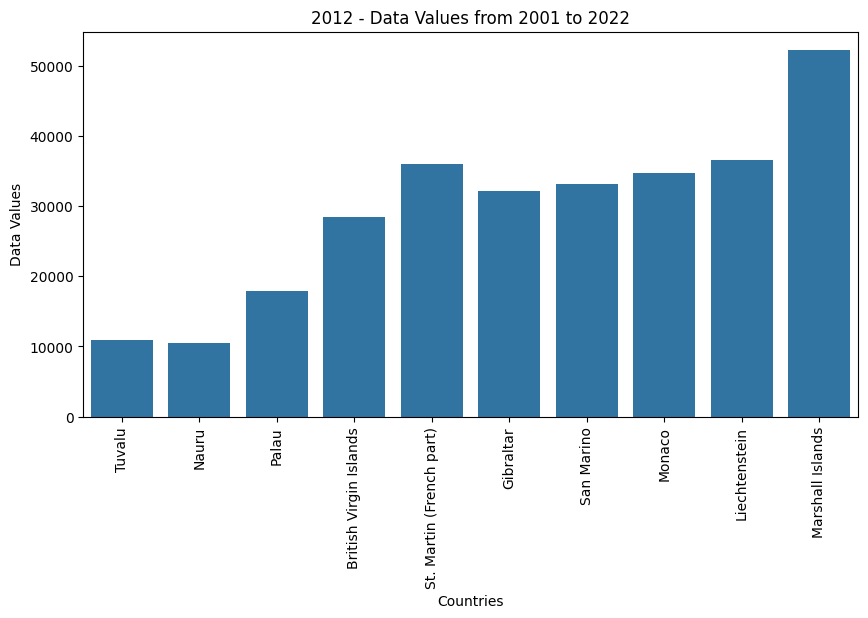

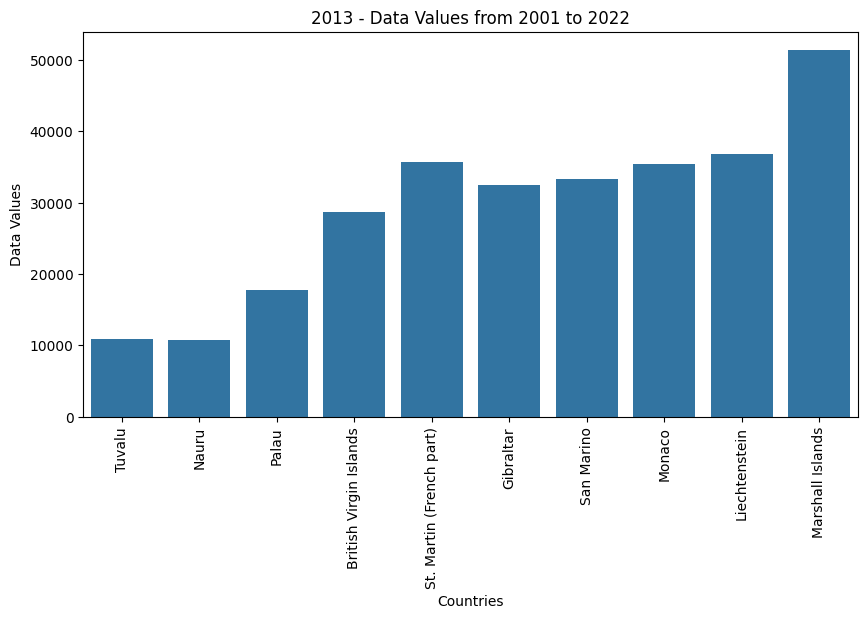

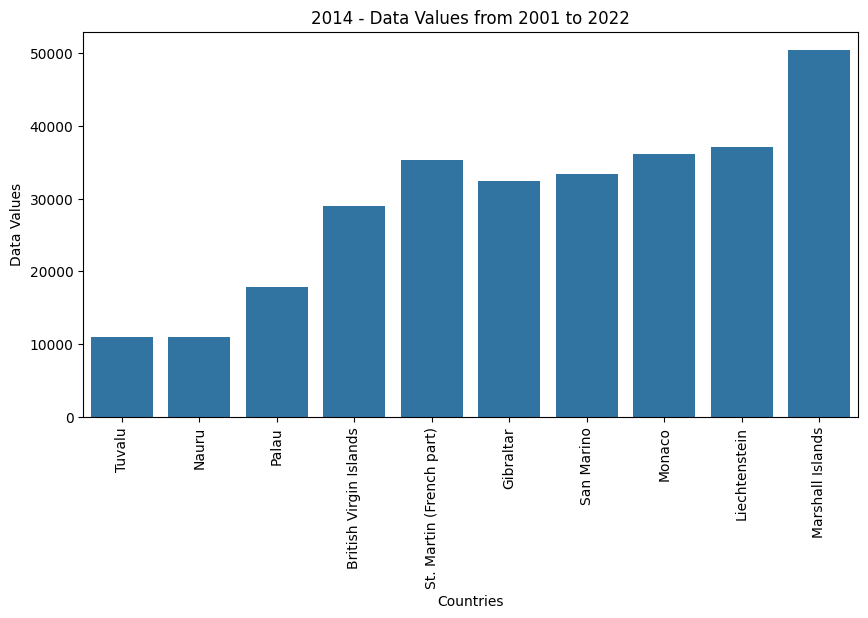

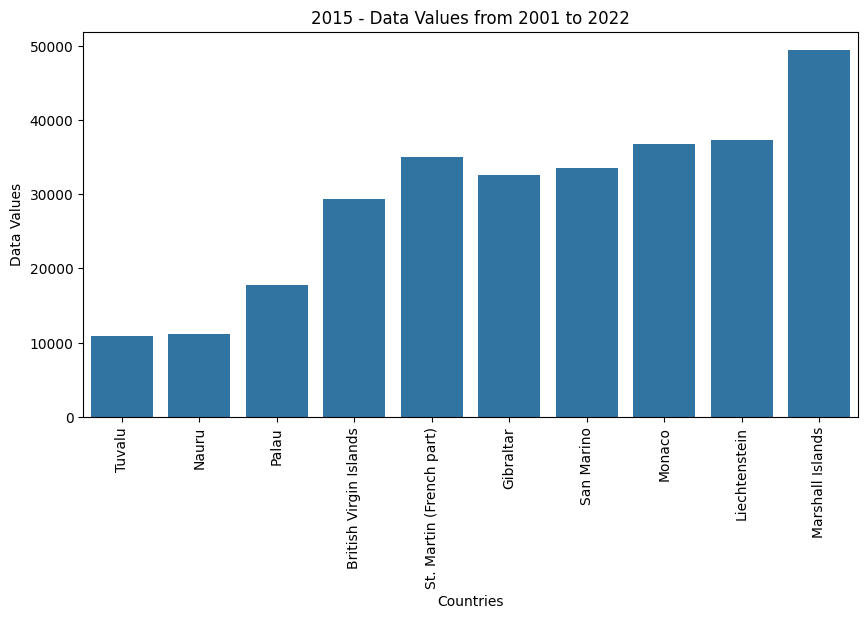

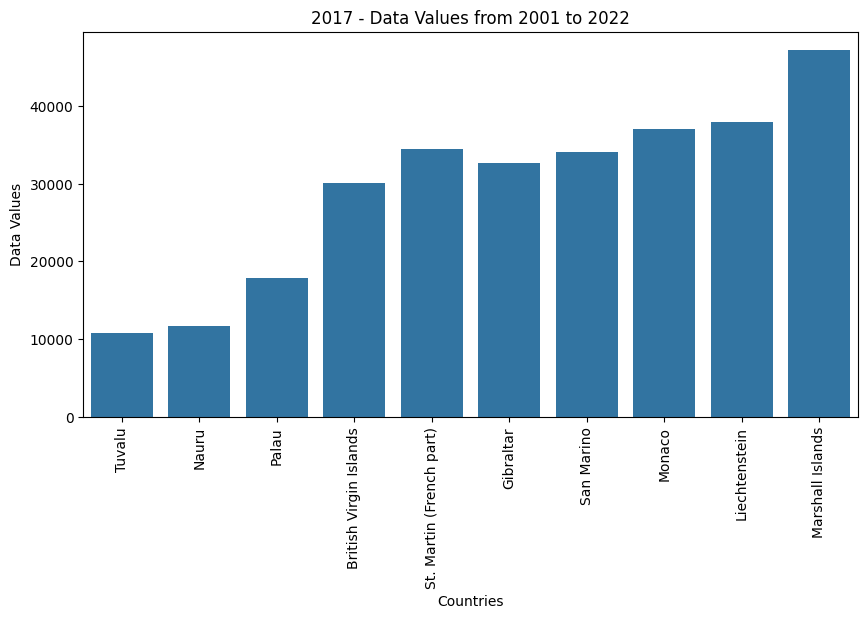

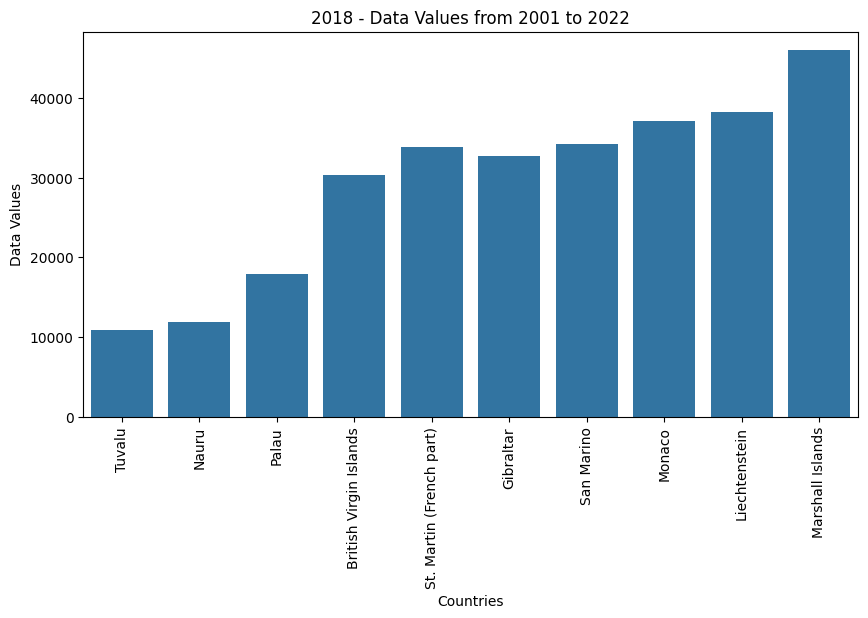

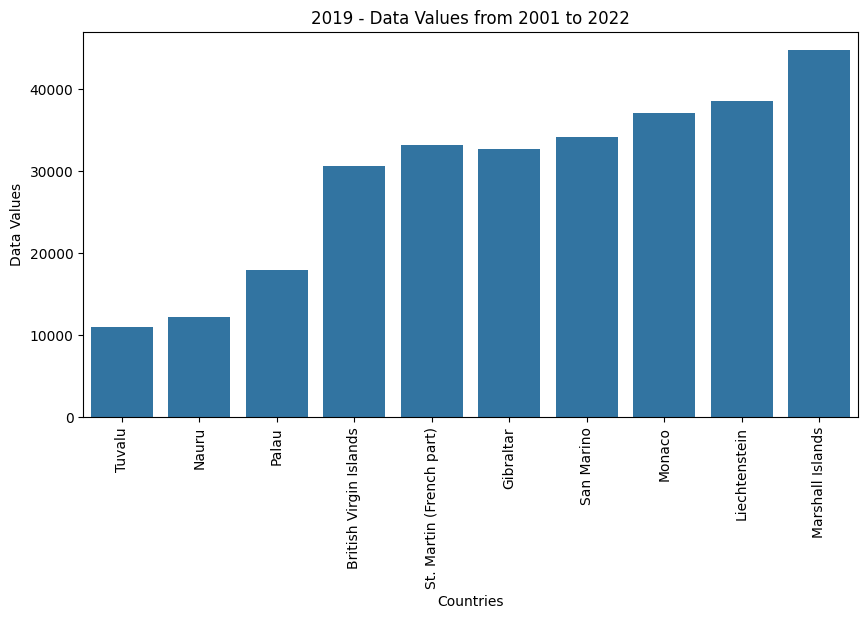

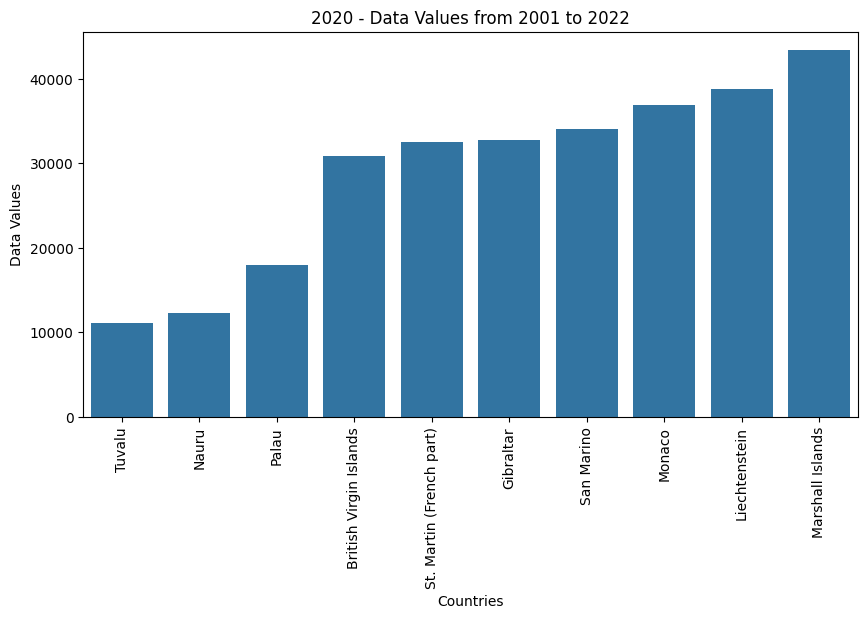

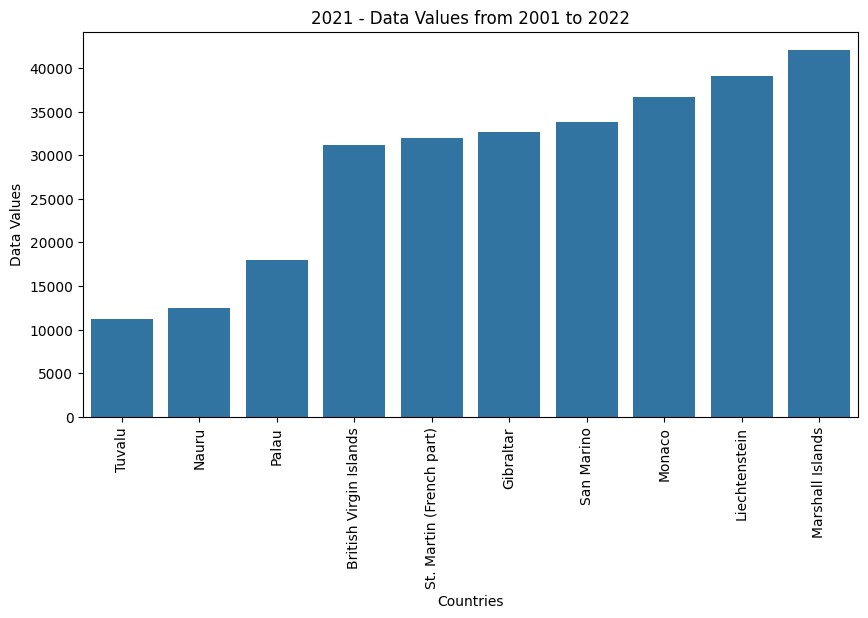

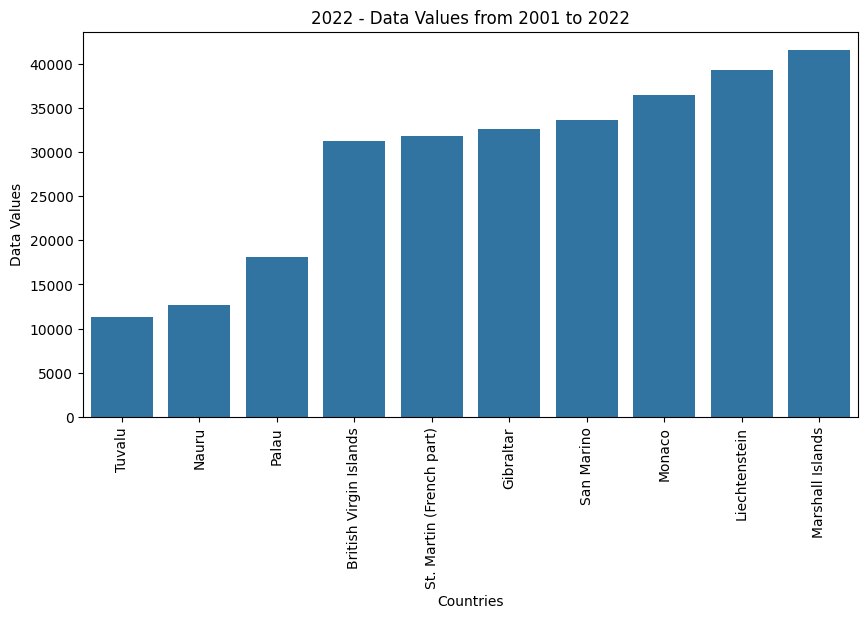

In [ ]:
country_by_2022=data.sort_values(by="2022").head(10)
country_by_2022_t=country_by_2022[years].T
for country_name, data_values in country_by_2022_t.iterrows():
    fig = plt.figure(figsize=(10, 5))
    sns.barplot(x=data_values.index, y=data_values.values)
    plt.xlabel('Countries')
    plt.ylabel('Data Values')
    plt.title(f"{country_name} - Data Values from 2001 to 2022")
    plt.xticks(rotation=90)
    plt.show()

# **Insights:**
**Highest Indicator Value Year-Wise with Reference to Base Year 2022: Marshall Islands is the country with the highest indicator value for each year from 2001 to 2022.**

# **Other Countries with Good Indicator Values:**
  *   In the initial years (e.g., 2001), countries like Monaco, and St. Matin(French Part) have good indicator values.
  * In the late years (e.g., 2022), countries like Gibraltar and San Marino have good indicator values.
# **conclusion**
 we have used World Development Indicator Dataset which represents indicator values ​​of different countries from 2000 to 2022. we have seen that with the coming of next year the values ​​of indicator keep rising.
